<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Predicci%C3%B3n_de_churn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as dts
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_graphviz #permite exportar el árbol
from sklearn.tree import plot_tree

In [ ]:
#Cargar dataframe
df = pd.read_excel("Telco-Customer-Churn.xlsx")

In [ ]:
#Mostrar las 5 primeras filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Etiqueta o variable objetivo: churn (si/no)

In [ ]:
#Análisis de tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
#Análisis de metricas estadisticas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

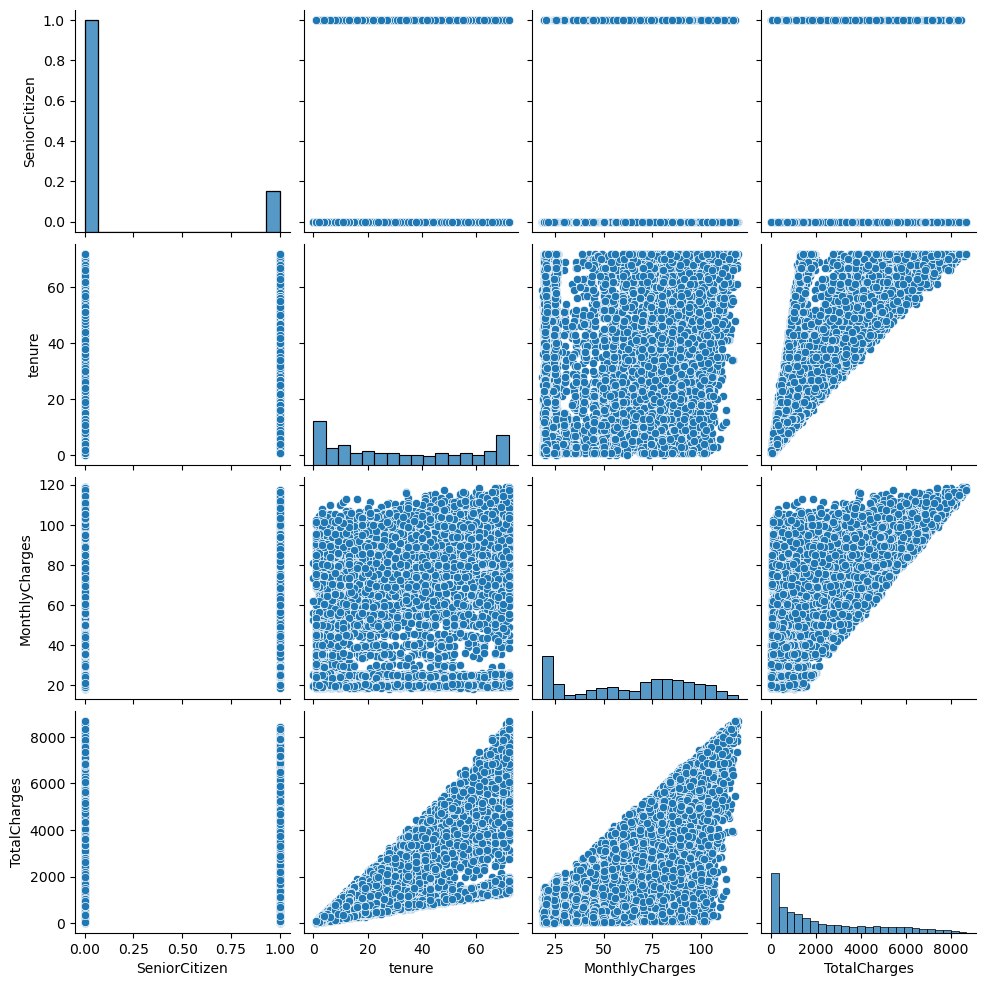

In [ ]:
#Análisis grafico de correlaciones
sns.pairplot(df)

In [ ]:
#Eliminar duplicados
df = df.drop_duplicates()

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Después del análisis exploratorio, procedemos a preprocesar los datos, incluyendo la limpieza, la transformación y la normalización
de la  características según sea necesari:


In [ ]:
#Copiamos el set de datos en un nuevo df
df_clean = df.copy()

In [ ]:
#Convertir la columna a númerico
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

In [ ]:
#Eliminar valores nulos
df_clean.dropna(inplace=True)

In [ ]:
#Eliminar columna que no genera valor
df_clean.drop(columns=['customerID'], inplace=True)

In [ ]:
#Eliminar duplicados
df_clean = df_clean.drop_duplicates()
df_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Convertir variables categoricas a numeros
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cat = encoder.fit_transform(df_clean[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols), index=df_clean.index)

C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#Combinar
df_clean = pd.concat([df_clean.drop(columns=cat_cols), encoded_cat_df], axis=1)

In [ ]:
#Convertir churn a binaria
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
#Normalizar columnas numericas
scaler = MinMaxScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

In [ ]:
df_clean

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0.464789,0.385075,0.215867,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.014085,0.354229,0.010310,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.619718,0.239303,0.210241,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.014085,0.521891,0.015330,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0,1.000000,0.845274,0.847461,0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0,0.140845,0.112935,0.037809,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1,0.042254,0.558706,0.033210,1,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Ahora, se aplicaran diferentes algoritmos de clasificación en el modelamiento supervisado, se evaluará rendimiento mediante metricas de desempeño (métricas de matriz de confusión, validación cruzada-cross validation) y se optimizarán hiperparametros:

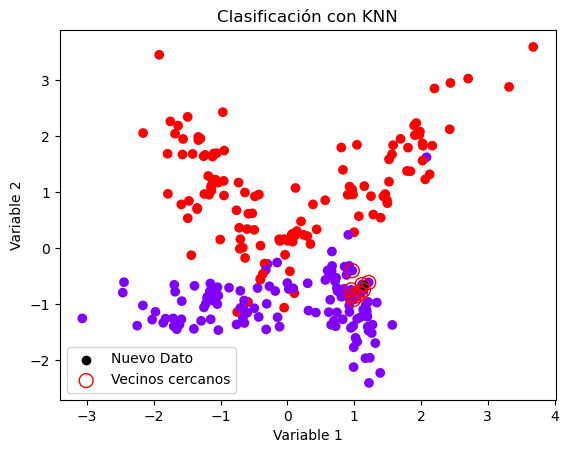

In [ ]:
#Aplicación de modelo supervisado de clasificación
#Algoritmo K-Nearest Neighbors (KNN)
X, y = make_classification(n_samples=250, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=4000)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X, y)
#Generar un nuevo dato de prueba
new_data = np.array([[1.15, -0.65]])

#Realizar predicciones en el nuevo dato de prueba
prediction = knn.predict(new_data)

#Obtener los k vecinos más cercanos al nuevo dato de prueba, y las distancias respectivas
distances, indices = knn.kneighbors(new_data)

#Plotear los datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

#Plotear el nuevo dato de prueba
plt.scatter(new_data[:, 0], new_data[:, 1], color='black', marker='o', label='Nuevo Dato')

#Plotear un círculo alrededor de los k vecinos más cercanos
plt.scatter(X[indices, 0], X[indices, 1], facecolors='none', edgecolors='red', marker='o', s=100, label='Vecinos cercanos')

#Visualizar grafico
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Clasificación con KNN')
plt.legend()
plt.show()

In [ ]:
prediction

array([0])

In [ ]:
y[indices]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
distances

array([[0.03186826, 0.07914865, 0.09602573, 0.16230355, 0.21479902,
        0.22567701, 0.25668987, 0.3072256 , 0.30752389]])

In [ ]:
len(X[0])

2

In [ ]:
len(X)

250

In [ ]:
#Entrenar el modelo con los ultimos datos de prueba
df_clean

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0.464789,0.385075,0.215867,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.014085,0.354229,0.010310,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.619718,0.239303,0.210241,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.014085,0.521891,0.015330,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0,1.000000,0.845274,0.847461,0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0,0.140845,0.112935,0.037809,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1,0.042254,0.558706,0.033210,1,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
%%time
#Evaluar modelo -matriz de confusión-
#Crear el clasificador KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

#Mostrar el informe de métricas de clasificación
report = classification_report(y_test, y_pred)

#Imprimimos reporte para visualizar matriz de confusión
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.95      0.95      0.95        21

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

CPU times: total: 15.6 ms
Wall time: 24.6 ms


In [ ]:
len(y_train)

200

In [ ]:
y_train.sum()

103

In [ ]:
y_train.sum()/len(y_train)

0.515

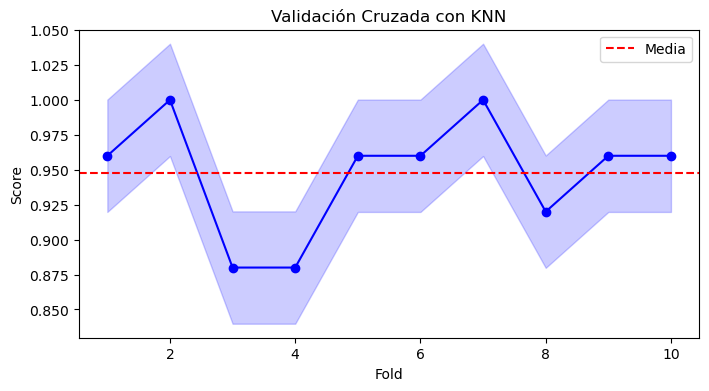

CPU times: total: 125 ms
Wall time: 137 ms


In [ ]:
%%time
#Evaluar el modelo (validación cruzada)
#Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, y, cv=10)

#Calcular la media y la desviación estándar de los scores
mean_score = np.mean(scores)
std_score = np.std(scores)

#Plotear los resultados de la validación cruzada
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), scores, marker='o', linestyle='-', color='b')
plt.fill_between(range(1, 11), scores - std_score, scores + std_score, alpha=0.2, color='b')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Media')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Validación Cruzada con KNN')
plt.legend()
plt.show()

In [ ]:
scores

array([0.96, 1.  , 0.88, 0.88, 0.96, 0.96, 1.  , 0.92, 0.96, 0.96])

In [ ]:
df_clean.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.014456,0.219131,0.101642,0.151270,-0.001069,0.016030,-0.211479,0.008724,-0.008724,...,-0.181713,0.104830,-0.181713,0.119247,-0.047053,-0.116898,0.155922,-0.024909,0.170949,-0.151840
tenure,0.014456,1.000000,0.244194,0.825293,-0.353339,0.006370,0.379564,0.161288,0.009217,-0.009217,...,-0.033641,0.278077,-0.033641,0.283212,0.200872,0.563273,0.003709,0.231385,-0.211583,-0.228902
MonthlyCharges,0.219131,0.244194,1.000000,0.650540,0.194008,-0.012361,0.095277,-0.114641,0.249625,-0.249625,...,-0.762181,0.629336,-0.762181,0.626885,0.003271,-0.075152,0.350900,0.028552,0.269931,-0.373324
TotalCharges,0.101642,0.825293,0.650540,1.000000,-0.198362,0.000879,0.317021,0.062762,0.114222,-0.114222,...,-0.373655,0.514548,-0.373655,0.518704,0.169300,0.357016,0.157449,0.181387,-0.061060,-0.292598
Churn,0.151270,-0.353339,0.194008,-0.198362,1.000000,-0.008694,-0.148670,-0.162366,0.011072,-0.011072,...,-0.228220,0.065058,-0.228220,0.062670,-0.177742,-0.301375,0.190518,-0.134052,0.301079,-0.091649
gender_Male,-0.001069,0.006370,-0.012361,0.000879,-0.008694,1.000000,-0.000583,0.010912,-0.007799,0.007799,...,0.003164,-0.006488,0.003164,-0.009471,0.008196,-0.003146,-0.011497,0.002070,0.001452,0.011727
Partner_Yes,0.016030,0.379564,0.095277,0.317021,-0.148670,-0.000583,1.000000,0.451254,0.019420,-0.019420,...,0.002823,0.122387,0.002823,0.115979,0.081661,0.246114,-0.014856,0.080889,-0.083856,-0.093854
Dependents_Yes,-0.211479,0.161288,-0.114641,0.062762,-0.162366,0.010912,0.451254,1.000000,-0.000408,0.000408,...,0.141100,-0.018146,0.141100,-0.040073,0.068243,0.200783,-0.110973,0.060125,-0.149862,0.059159
PhoneService_Yes,0.008724,0.009217,0.249625,0.114222,0.011072,-0.007799,0.019420,-0.000408,1.000000,-1.000000,...,0.171445,-0.020595,0.171445,-0.032697,-0.002615,0.005022,0.017017,-0.006381,0.002890,-0.005708
MultipleLines_No phone service,-0.008724,-0.009217,-0.249625,-0.114222,-0.011072,0.007799,-0.019420,0.000408,-1.000000,1.000000,...,-0.171445,0.020595,-0.171445,0.032697,0.002615,-0.005022,-0.017017,0.006381,-0.002890,0.005708


In [ ]:
!pip install graphviz

In [ ]:
df_clean = df_clean.dropna()
df_clean

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0.464789,0.385075,0.215867,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.014085,0.354229,0.010310,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.619718,0.239303,0.210241,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.014085,0.521891,0.015330,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0,1.000000,0.845274,0.847461,0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0,0.140845,0.112935,0.037809,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1,0.042254,0.558706,0.033210,1,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
%%time
#Aplicación de modelo supervisado de clasificación
#Algoritmo: arbol de decisión
import graphviz
from sklearn import preprocessing

#Separar características y etiquetas
features = df_clean.drop('Churn', axis=1)
labels = df_clean['Churn']

#Crear y entrenar el modelo
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(features, labels)

#Exportar el árbol como DOT
dot_data = export_graphviz(decision_tree,
                           out_file=None,
                           feature_names=features.columns,
                           class_names=["No", "Yes"],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           impurity=False)

#Visualizar usando graphviz
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree')  #Guarda como decision_tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.455319 to fit


CPU times: total: 484 ms
Wall time: 7.21 s


'decision_tree.png'

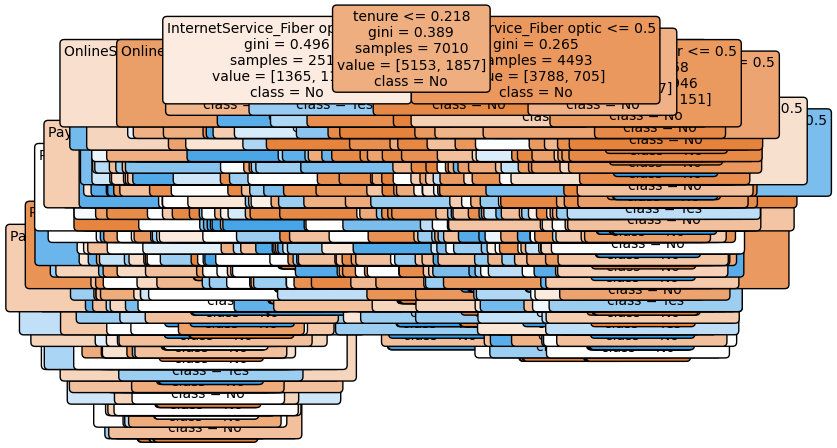

In [ ]:
#Dibujar el árbol
plot_tree(decision_tree,
          feature_names=features.columns,
          class_names=["No", "Yes"],
          filled=True,
          rounded=True,
          fontsize=10)

#Mostrarlo en el notebook
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.455319 to fit


'decision_tree.png'

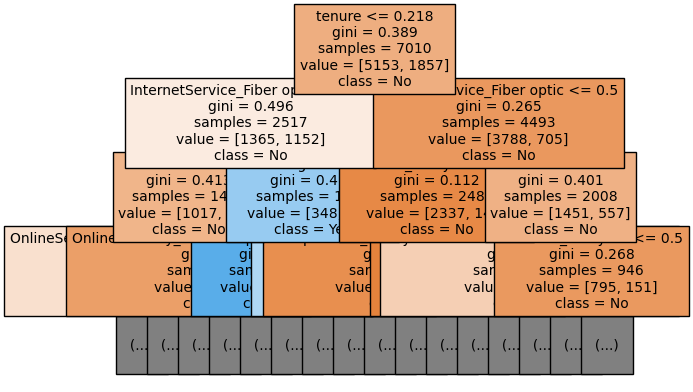

In [ ]:
#Hacer el arbol menos denso
plot_tree(decision_tree,
          feature_names=features.columns,
          class_names=["No", "Yes"],
          filled=True,
          max_depth=3,  #solo muestra los primeros 3 niveles
          fontsize=10)
graph.view()  #Abre el archivo

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
#Definir los valores a probar para los hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#Definir el árbol de decisión
tree = DecisionTreeClassifier()

#Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(tree, param_grid, cv=5, verbose=2)
grid_search.fit(X, y)

#Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros:", best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_l

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=5)

In [ ]:
grid_search.best_estimator_.feature_importances_

array([0.11712348, 0.88287652])

In [ ]:
len(grid_search.best_estimator_.feature_importances_)

2

In [ ]:
len(X[0])

2

In [ ]:
grid_search.best_estimator_.predict([X[0]])

array([1])

In [ ]:
y[0]

1

In [ ]:
grid_search.predict([X[0]])

array([1])

In [ ]:
columnas = features.columns

In [ ]:
columnas.size

30